## 1. Download the libraries

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

## 2. Database

In [10]:
db=yf.download("AMZN AAPL",start='2022-01-01', end='2023-01-01')
db

[*********************100%%**********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        AMZN        AAPL        AMZN        AAPL   
Date                                                                     
2022-01-03  180.190979  170.404495  182.009995  170.404495  182.880005   
2022-01-04  177.904053  167.522003  179.699997  167.522003  182.940002   
2022-01-05  173.171844  164.356995  174.919998  164.356995  180.169998   
2022-01-06  170.281021  163.253998  172.000000  163.253998  175.300003   
2022-01-07  170.449310  162.554001  172.169998  162.554001  174.139999   
...                ...         ...         ...         ...         ...   
2022-12-23  131.299820   85.250000  131.860001   85.250000  132.419998   
2022-12-27  129.477585   83.040001  130.029999   83.040001  131.410004   
2022-12-28  125.504539   81.820000  126.040001   81.820000  131.029999   
2022-12-29  129.059372   84.180000  129.610001   84.180000  130.479996   
2022-12-30  129.378006   84.000000  129.929993   84.000000  129.949997   

                               Low                    Open              \
                  AMZN        AAPL        AMZN        AAPL        AMZN   
Date                                                                     
2022-01-03  170.703506  177.710007  166.160507  177.830002  167.550003   
2022-01-04  171.399994  179.119995  166.349503  182.630005  170.438004   
2022-01-05  167.126495  174.639999  164.356995  179.610001  166.882996   
2022-01-06  164.800003  171.639999  161.936996  172.699997  163.450500   
2022-01-07  165.243500  171.029999  162.031006  172.889999  163.839005   
...                ...         ...         ...         ...         ...   
2022-12-23   85.779999  129.639999   82.930000  130.919998   83.250000   
2022-12-27   85.349998  128.720001   83.000000  131.380005   84.970001   
2022-12-28   83.480003  125.870003   81.690002  129.669998   82.800003   
2022-12-29   84.550003  127.730003   82.550003  127.989998   82.870003   
2022-12-30   84.050003  127.430000   82.470001  128.410004   83.120003   

               Volume            
                 AAPL      AMZN  
Date                             
2022-01-03  104487900  63520000  
2022-01-04   99310400  70726000  
2022-01-05   94537600  64302000  
2022-01-06   96904000  51958000  
2022-01-07   86709100  46606000  
...               ...       ...  
2022-12-23   63814900  57433700  
2022-12-27   69007800  57284000  
2022-12-28   85438400  58228600  
2022-12-29   75703700  54995900  
2022-12-30   77034200  62401200  

[251 rows x 12 columns]

<Axes: xlabel='Date'>

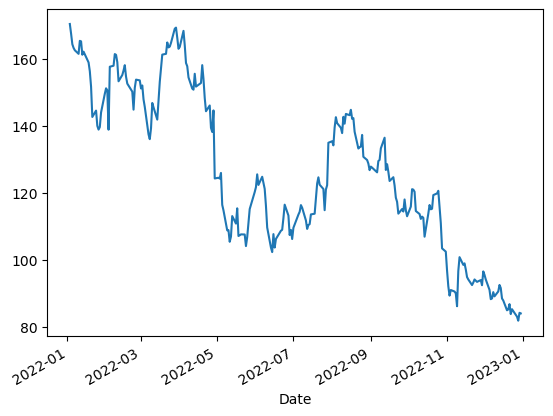

In [96]:
db["Close"].plot()

## 3. Stationarity (the stability of the variable -mean and variance-)

Antes de aplicar cualquier metodo de series de tiempo es necesario revisar la estacionaridad de la serie ¿como lo hacemos? Con la prueba de **(Augmented) Dickey-Fuller** relacionada con la estabilidad de la serie si el P-Value es menor que 0.05 entonces la serie es estable y la puedo predecir si P-Value es mayor que 0.05 entonces la serie es inestable y no la puedo predecir

In [97]:
from statsmodels.tsa.stattools import adfuller

test_stationarity=adfuller(db["Close"],autolag="AIC")
print("P-Value: ", test_stationarity[1])

P-Value:  0.5898040665184726


## 3.1 Primeras diferencias

In [98]:
db["Close_returns"]=db["Close"]-db["Close"].shift(1)

In [99]:
db

,Open,High,Low,Close,Adj Close,Volume,Close_returns
Date,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997
...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001


In [100]:
from statsmodels.tsa.stattools import adfuller

test_stationarity2=adfuller(db["Close_returns"].dropna(),autolag="AIC")
print("P-Value: ", test_stationarity2[1])

P-Value:  9.113792419377235e-29


## 4.0 Autocorrelation function AC

## 4. Partial autocorrelation function PAC

c:\Users\olasq\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


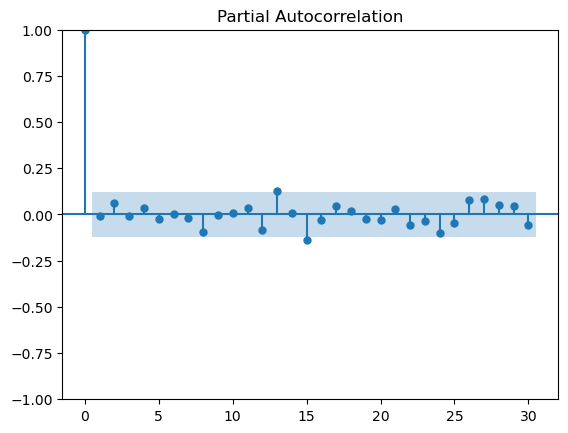

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf=plot_pacf(db["Close_returns"].dropna(),lags=30)
#numero de rezagos del modelo autorregresico AR
#MUESTRA LOS REZAGOS NECESARIOS PARA ESTABILIZAR EL PROCESO REGRESIVO


4.1 Autocorrelation function

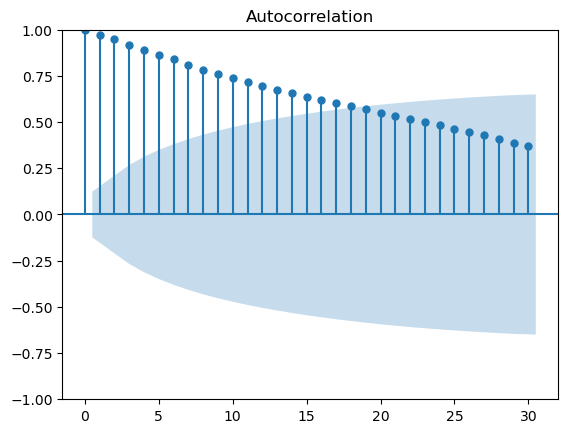

In [102]:
from statsmodels.graphics.tsaplots import plot_acf
acf=plot_acf(db["Close"].dropna(),lags=30)
#Numero de rezagos del modelo de promedios moviles MA
#Se utiliza para los promedios moviles


de acuerdo a los dos graficos vemos que el AR tiene orden 2 y el MA tiene orden dos, es decir que ambos a partir delsegundo rezago se estabilizan
(cuanto tienen que moverse para que se estabilicen)


## 5. Autorregresive model

ARIMA(p,d,q) p el numero de rezagos del AR, d el numero de diferencias en la serie, q es el numero de rezagos en el MA


In [103]:
from statsmodels.tsa.arima.model import ARIMA
modelARIMA=ARIMA(db["Close"].dropna(),order=(18,1,15)).fit()
print(modelARIMA.summary())

c:\Users\olasq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olasq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olasq\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\olasq\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:               ARIMA(18, 1, 15)   Log Likelihood                -685.397
Date:                Mon, 04 Sep 2023   AIC                           1438.794
Time:                        20:08:28   BIC                           1558.523
Sample:                             0   HQIC                          1486.982
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0955      3.169     -0.030      0.976      -6.306       6.115
ar.L2         -0.1022      2.376     -0.043      0.966      -4.760       4.556
ar.L3          0.0618      2.305      0.027      0.9

## 6. Predictions

In [104]:
pred=modelARIMA.predict(dynamic=False)

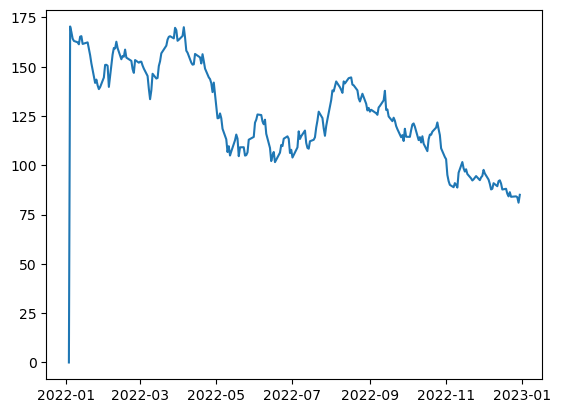

In [105]:
plt.plot(pred)

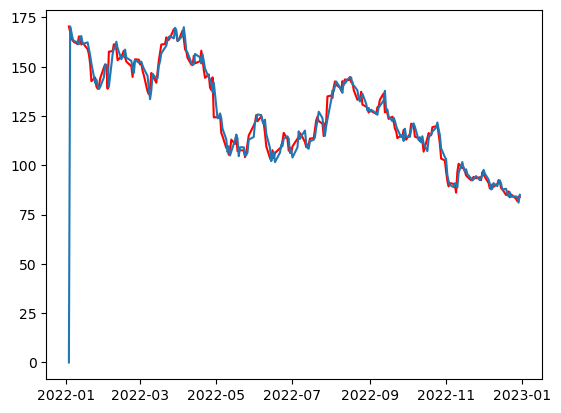

In [106]:
from matplotlib import pyplot

pyplot.plot(db["Close"].dropna(),color="red")
pyplot.plot(pred)